In [1]:
from TCN_BIRTH import endtoend
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#TIME SERIES BIRTH RATES
ts = pd.read_csv('birth-death/live-birth.csv', thousands=",").T
ts.iloc[0][0] = "Total Live-Births"
ts = ts.rename(columns=ts.iloc[0]).drop(ts.index[0])
ts.index.names = ['quarter']
ts.reset_index(level=0, inplace=True)
ts["quarter"] =ts["quarter"].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2')
ts['time'] = pd.PeriodIndex(ts['quarter'], freq='Q').to_timestamp()

/tmp/ipykernel_10882/2561070917.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  ts["quarter"] =ts["quarter"].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2')


In [6]:
## LABOUR COST ACROSS INDUSTRIES ( FACTOR PAYMENTS)

## labour cost per industry data
lc_across_industry = pd.read_csv("./unit-labour-cost-index-base-year-2015-100-quarterly/unit-labour-cost-index-base-year-2015-100-by-industry-quarterly.csv")
sector = lc_across_industry.columns[3]
## across industries data
lc_overall = pd.read_csv("./unit-labour-cost-index-base-year-2015-100-quarterly-sa/unit-labour-cost-index-base-year-2015-100-quarterly-sa.csv")
combined_lc = pd.concat([lc_across_industry, lc_overall])
combined_lc[sector].fillna(combined_lc[combined_lc.columns[1]], inplace=True)
### COMBINED industries
df_lc = combined_lc.pivot_table(index="quarter", values= "value", columns = sector)
df_lc.reset_index(level=0, inplace=True)
combined_lc.pivot(index="quarter", columns=sector, values="value")

test_lc =pd.merge(ts, df_lc, on='quarter', how='inner')
raw_lc = test_lc.dropna().reset_index(drop=True)
raw_lc = raw_lc[::-1].reset_index(drop = True)
raw_lc

,quarter,Total Live-Births,1st Live-Birth,2nd Live-Birth,3rd Live-Birth,4th Live-Birth,5th Live-Birth,6th Live-Birth & Over,time,Unit Labour Cost Of Accommodation & Food Services,...,Unit Labour Cost Of Construction,Unit Labour Cost Of Finance & Insurance,Unit Labour Cost Of Information & Communications,Unit Labour Cost Of Manufacturing,Unit Labour Cost Of Other Goods Industries,Unit Labour Cost Of Other Services Industries,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Transportation & Storage,Unit Labour Cost Of Utilities,Unit Labour Cost Of Wholesale & Retail Trade
0,1986-Q1,9954,4414,3553,1433,316,103,61,1986-01-01,59.7,...,67.5,53.3,86.0,124.6,61.2,57.1,73.7,62.3,88.6,123.0
1,1986-Q2,9353,4186,3367,1271,332,87,50,1986-04-01,56.2,...,57.3,44.9,86.7,93.4,50.4,53.5,68.8,53.7,74.7,95.5
2,1986-Q3,9854,4398,3475,1395,359,98,44,1986-07-01,54.6,...,67.8,45.9,87.3,91.1,47.8,52.9,68.0,53.3,72.8,95.1
3,1986-Q4,10239,4782,3423,1454,351,98,51,1986-10-01,56.5,...,72.6,61.4,94.1,104.9,51.5,63.3,66.7,58.1,94.1,98.1
4,1987-Q1,8834,4007,3053,1234,320,81,56,1987-01-01,56.2,...,78.9,44.7,87.7,104.1,54.4,50.5,66.1,60.6,73.0,114.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,2018-Q2,9427,4387,3338,1168,374,94,66,2018-04-01,97.9,...,109.2,105.7,106.6,75.7,123.8,96.7,100.1,104.4,95.8,102.9
130,2018-Q3,9841,4574,3532,1224,337,116,58,2018-07-01,93.6,...,108.7,100.9,101.5,73.4,119.3,105.6,100.5,101.2,100.3,101.8
131,2018-Q4,10173,4711,3670,1232,372,109,79,2018-10-01,104.7,...,112.7,105.0,107.3,93.1,136.3,110.1,101.9,113.1,111.8,115.8
132,2019-Q1,9402,4456,3316,1128,316,105,81,2019-01-01,111.1,...,114.6,100.9,114.6,94.4,140.6,119.3,102.3,113.6,126.0,123.1


In [4]:
target = list(raw_lc)[1]
cols = list(raw_lc)[9:20]
timelist = list(raw_lc['time'])
print('Training set shape:{}'.format(test_lc.shape))
print('Length of Time Series: {}'.format(len(timelist)))
print('Feature targetted: {}'.format(target))
print('Featured selected: {}'.format(cols))

Training set shape:(136, 21)
Length of Time Series: 134
Feature targetted: Total Live-Births
Featured selected: ['Unit Labour Cost Of Accommodation & Food Services', 'Unit Labour Cost Of Business Services', 'Unit Labour Cost Of Construction', 'Unit Labour Cost Of Finance & Insurance', 'Unit Labour Cost Of Information & Communications', 'Unit Labour Cost Of Manufacturing', 'Unit Labour Cost Of Other Goods Industries', 'Unit Labour Cost Of Other Services Industries', 'Unit Labour Cost Of Overall Economy', 'Unit Labour Cost Of Transportation & Storage', 'Unit Labour Cost Of Utilities']


mse:  8707927.0 mae:  2568.811


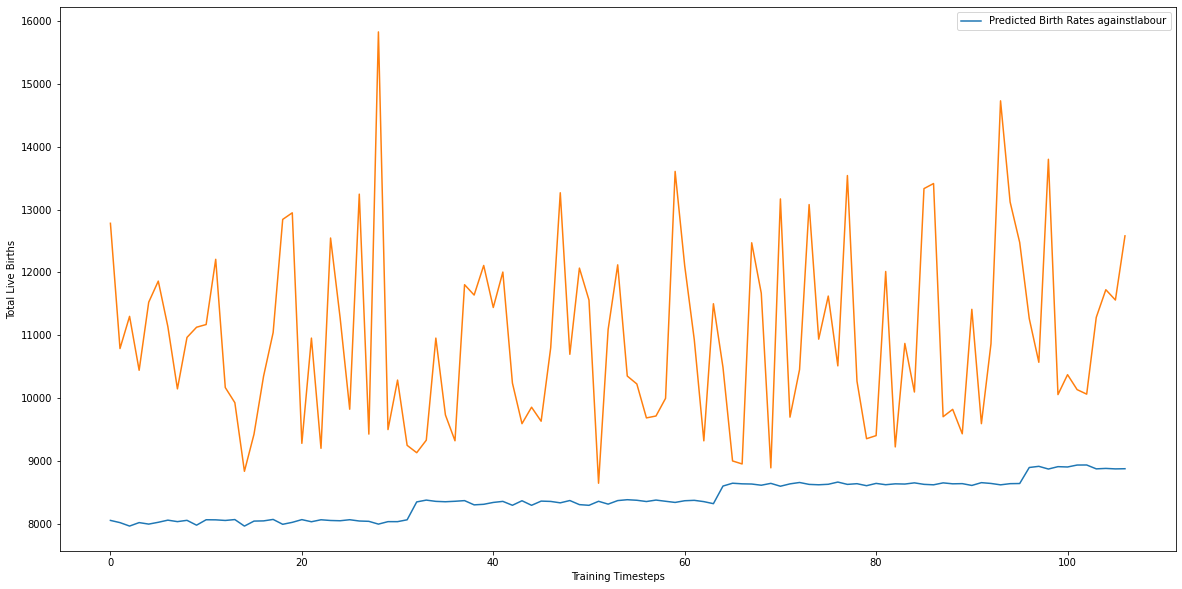

Iter:  0 train_loss:  0.6495588570833206 val_loss:  0.17451800405979156
Iter:  1 train_loss:  0.31265614181756973 val_loss:  0.09973388910293579
Iter:  2 train_loss:  0.18146373704075813 val_loss:  0.08574812859296799
Iter:  3 train_loss:  0.2071160487830639 val_loss:  0.08074765652418137
Iter:  4 train_loss:  0.1941259764134884 val_loss:  0.08653029799461365
Iter:  5 train_loss:  0.16514924727380276 val_loss:  0.08584504574537277
Iter:  6 train_loss:  0.14524454437196255 val_loss:  0.0812833160161972
Iter:  7 train_loss:  0.1426059678196907 val_loss:  0.0778566300868988
Iter:  8 train_loss:  0.12403077445924282 val_loss:  0.07410234212875366
Iter:  9 train_loss:  0.12086038291454315 val_loss:  0.06890004873275757
mse:  1353391.8 mae:  898.3628


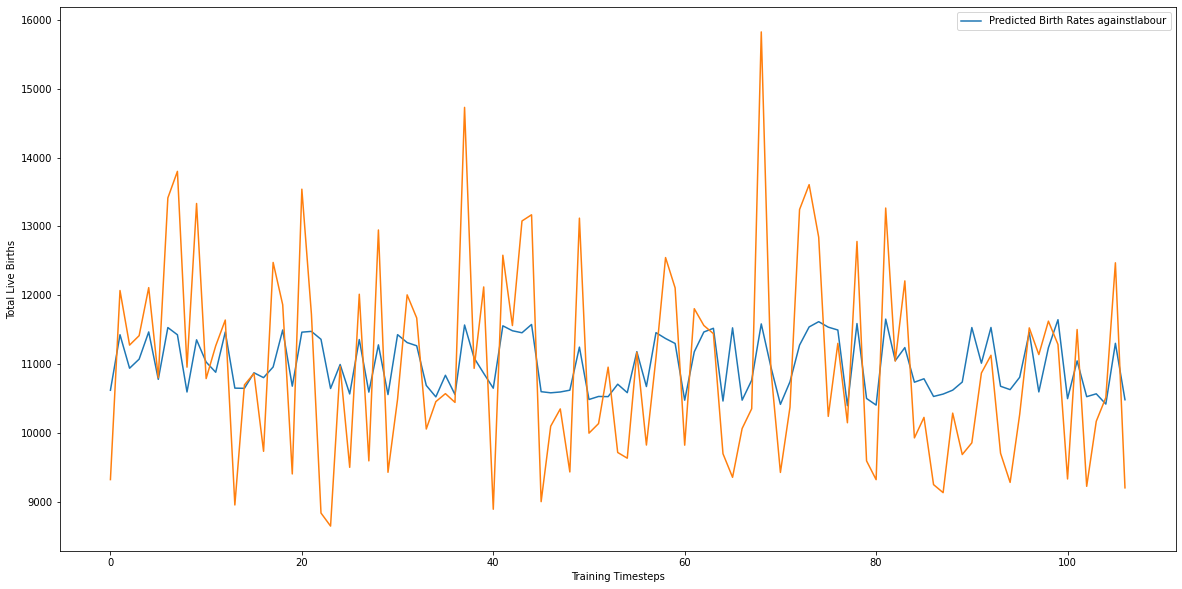

Iter:  10 train_loss:  0.09583228640258312 val_loss:  0.06164023280143738
Iter:  11 train_loss:  0.07672637514770031 val_loss:  0.05125090107321739
Iter:  12 train_loss:  0.06276998948305845 val_loss:  0.04288802295923233
Iter:  13 train_loss:  0.07111017405986786 val_loss:  0.047859467566013336
Iter:  14 train_loss:  0.05110846180468798 val_loss:  0.04728979244828224
Iter:  15 train_loss:  0.05322100780904293 val_loss:  0.04696391150355339
Iter:  16 train_loss:  0.07701564859598875 val_loss:  0.04487497732043266
Iter:  17 train_loss:  0.048740928526967764 val_loss:  0.04840831458568573
Iter:  18 train_loss:  0.040278976783156395 val_loss:  0.04855227470397949
Iter:  19 train_loss:  0.042548776138573885 val_loss:  0.054588187485933304
mse:  563665.25 mae:  550.0277


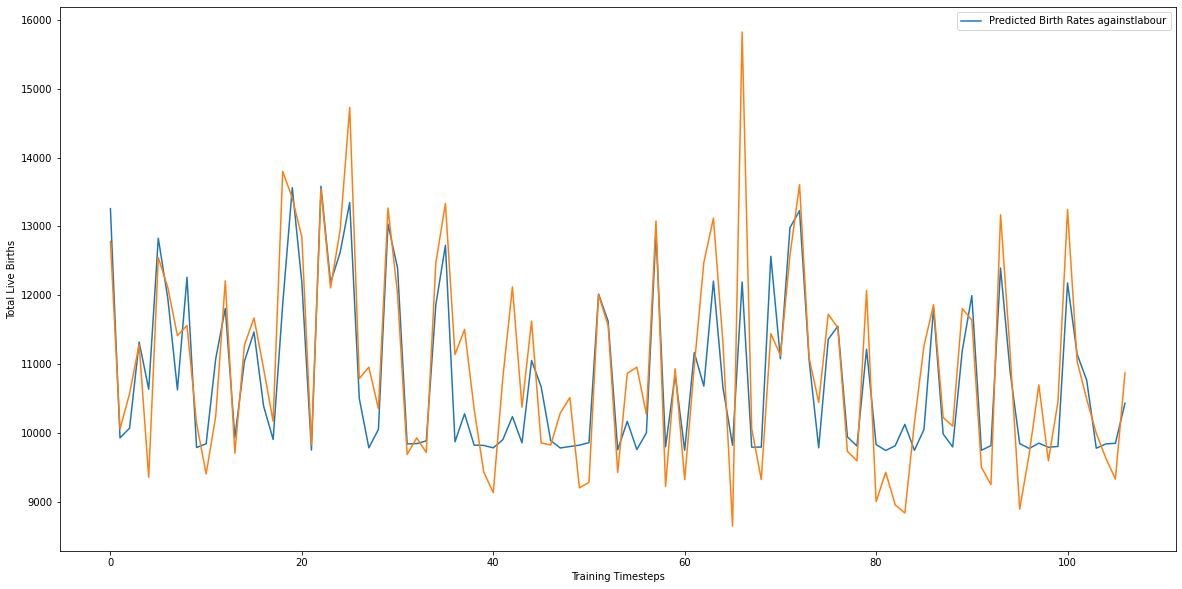

Iter:  20 train_loss:  0.03995844814926386 val_loss:  0.05083998665213585
Iter:  21 train_loss:  0.03723367769271135 val_loss:  0.04486020281910896
0.055098273 0.18613368


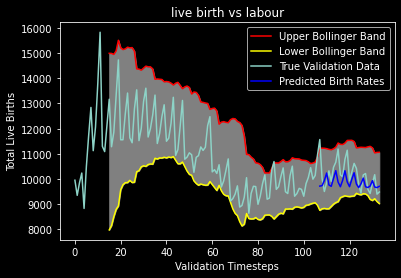

<Figure size 12000x12000 with 0 Axes>

In [5]:
endtoend(target, cols, raw_lc, "labour")